In [48]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import pickle

In [49]:
def powerlaw_exponent(eigspec: np.ndarray) -> float:
    start, end = 0, np.log10(len(eigspec))
    eignum = np.logspace(start, end, num=50).round().astype(int)
    eigspec = eigspec[eignum - 1]
    logeignum = np.log10(eignum)
    logeigspec = np.log10(eigspec)

    # remove infs when eigenvalues are too small
    filter_ = ~np.isinf(logeigspec)
    logeignum = logeignum[filter_]
    logeigspec = logeigspec[filter_]
    linear_fit = LinearRegression().fit(logeignum.reshape(-1, 1), logeigspec)
    alpha = -linear_fit.coef_.item()
    return alpha, linear_fit.intercept_


def plot_eigspec(data,layers,title):
    
    fig = plt.figure(figsize=(8,6),dpi=200,facecolor='white')
    a, y = powerlaw_exponent(data)
    plt.plot(np.arange(1,len(data)+1),data/(10**y),label=f'alpha = {round(a,2)}')
    #plt.bar(np.arange(1,len(data)+1),data,label=f'alpha = {round(a,2)}')
    idx = np.arange(0,len(data))
    plt.plot(idx, 1/idx, label='reference', linestyle='dashed') 
    plt.title(title)
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()


/tmp/ipykernel_54727/4028001216.py:24: RuntimeWarning: divide by zero encountered in divide
  plt.plot(idx, 1/idx, label='reference', linestyle='dashed')


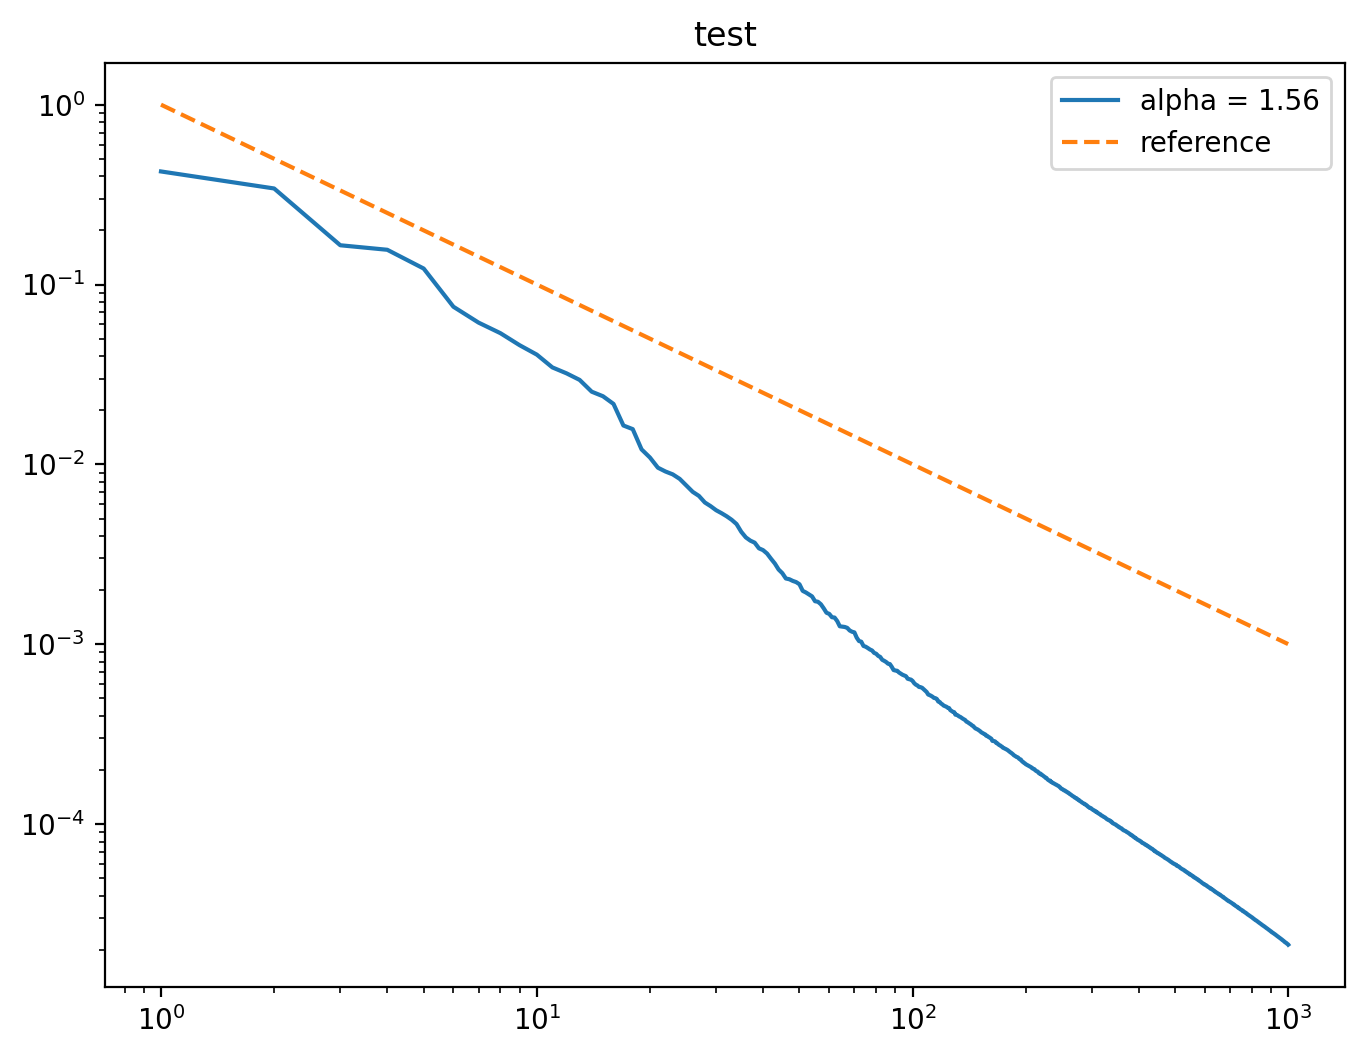

In [53]:
file_path = '/data/atlas/.cache/pca/expansion_model_3_layers_10000_features_majajhong'
with open(file_path, 'rb') as f:
    pca = pickle.load(f)
layers = ['last']
title = 'test'
plot_eigspec(pca.explained_variance_[1:1000], layers, title)

/tmp/ipykernel_54727/4028001216.py:24: RuntimeWarning: divide by zero encountered in divide
  plt.plot(idx, 1/idx, label='reference', linestyle='dashed')


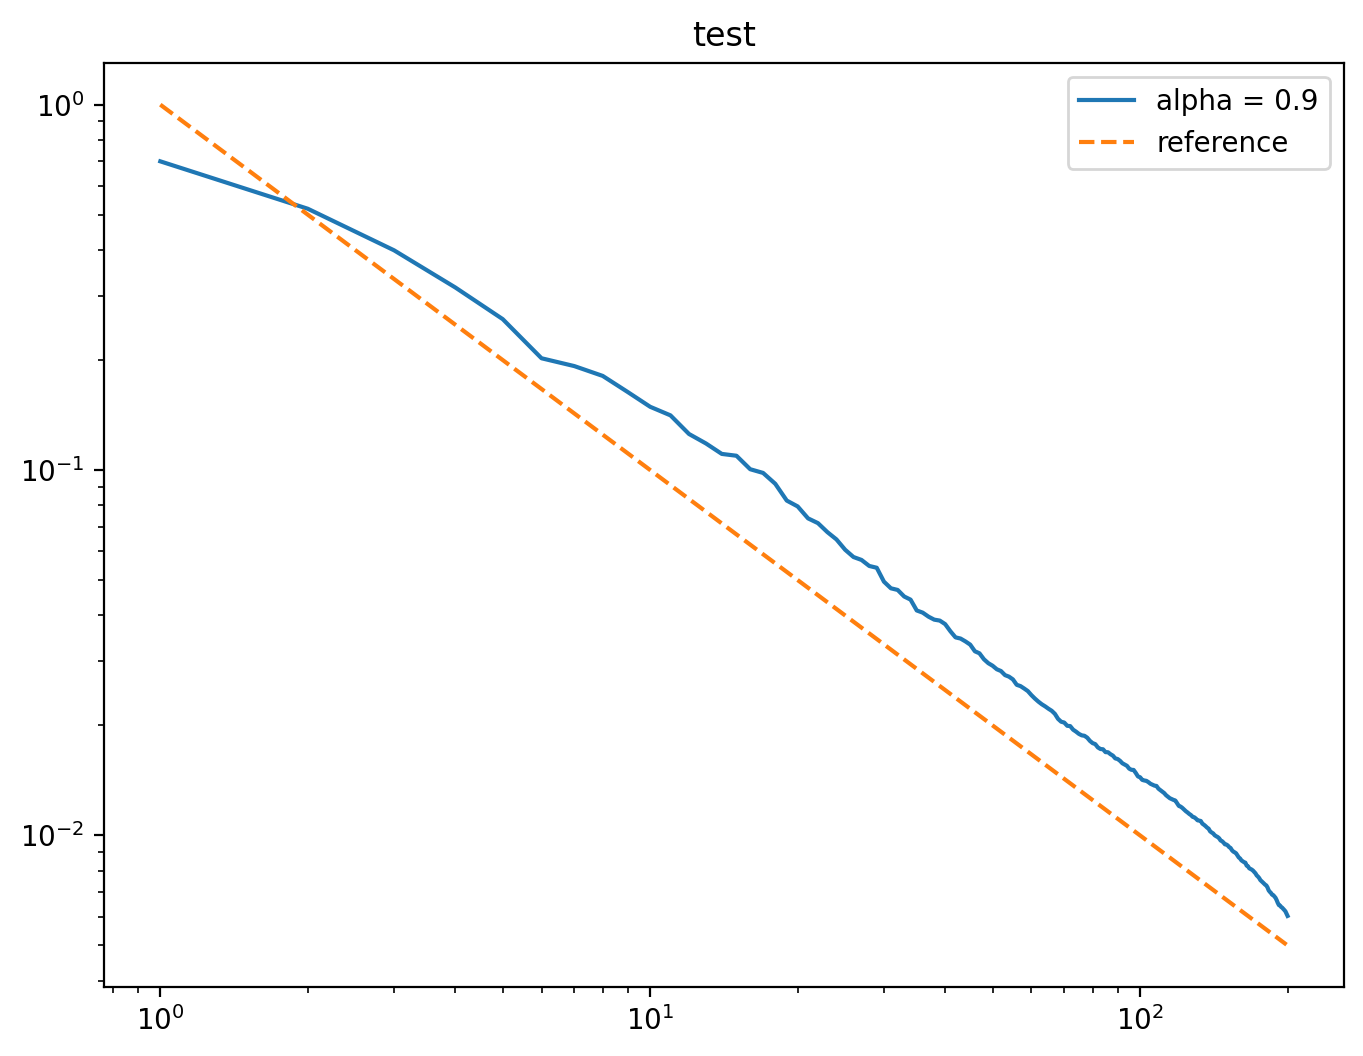

In [52]:
file_path = '/data/atlas/.cache/pca/alexnet_conv5_5_layers_256_features_majajhong'
with open(file_path, 'rb') as f:
    pca = pickle.load(f)
layers = ['last']
title = 'test'
plot_eigspec(pca.explained_variance_[:200], layers, title)